In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Handling Missing Data

In [5]:
df = pd.DataFrame({'Height':[160,70,np.nan,180,175,np.nan,np.nan,165,172,168]})
df

,Height
0,160.0
1,70.0
2,NaN
3,180.0
4,175.0
5,NaN
6,NaN
7,165.0
8,172.0
9,168.0


In [6]:
df.isnull().sum()

Height    3
dtype: int64

In [7]:
df.describe()

,Height
count,7.000000
mean,155.714286
std,38.361067
min,70.000000
25%,162.500000
50%,168.000000
75%,173.500000
max,180.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  7 non-null      float64
dtypes: float64(1)
memory usage: 212.0 bytes


In [23]:
mean_height =df['Height'].mean()
median_height = df['Height'].median()
mode_height = df['Height'].mode().values[0]

In [22]:
mode_height

array([ 70., 160., 165., 168., 172., 175., 180.])

In [27]:
df['Height'].fillna(mean_height,inplace=True)
# df.fillna({'Height': mean_height}, inplace=True)

C:\Users\shara\AppData\Local\Temp\ipykernel_11144\221032212.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Height'].fillna(mean_height,inplace=True)


In [26]:
df

,Height
0,160.000000
1,70.000000
2,155.714286
3,180.000000
4,175.000000
5,155.714286
6,155.714286
7,165.000000
8,172.000000
9,168.000000


# Handling Outliers

In [28]:
#Detecting the outliers

# Method 1 : Z-Score Method:
Measures how many standard deviations a data point is away from mean. Data points with z-score greater than a predefined threshold (often 2 or 3) are considered outliers

# Method 2 : IQR(Inquertile Range): 
The IQR is the range between the 75th and 25th percentiles of the data. Data points lying below Q1-1.5*IQR or above Q3+1.5*IQR are considered outliers

# Visualization: 
Plotting the data on a box plot or scatter plot can help visually identify outliers that fall far outside the main cluster of data points.

In [30]:
np.random.seed(42)
data = pd.DataFrame({
    'Feature_A':np.random.normal(loc=50,scale=10,size=100),
    'Feature_B':np.random.normal(loc=100,scale=20,size=100),
})

data

,Feature_A,Feature_B
0,54.967142,71.692585
1,48.617357,91.587094
2,56.476885,93.145710
3,65.230299,83.954455
4,47.658466,96.774286
...,...,...
95,35.364851,107.706348
96,52.961203,82.322851
97,52.610553,103.074502
98,50.051135,101.164174


In [31]:
# add some ouliers to data set
data.iloc[5,0]=500
data.iloc[20,1]=200
data.iloc[35,1]=250

In [32]:
##Remove outliers 

In [33]:
def remove_outliers_iqr(data,threshold=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1
    filtered_data = data[~((data<(Q1-threshold*IQR)) | (data>(Q3+threshold*IQR))).any(axis=1)]
    return filtered_data, data[~data.index.isin(filtered_data.index)]
    

In [34]:
filtered_data = remove_outliers_iqr(data)
filtered_data

(    Feature_A   Feature_B
 0   54.967142   71.692585
 1   48.617357   91.587094
 2   56.476885   93.145710
 3   65.230299   83.954455
 4   47.658466   96.774286
 ..        ...         ...
 95  35.364851  107.706348
 96  52.961203   82.322851
 97  52.610553  103.074502
 98  50.051135  101.164174
 99  47.654129   77.140594
 
 [95 rows x 2 columns],
      Feature_A   Feature_B
 5   500.000000  108.081017
 20   64.656488  200.000000
 35   37.791564  250.000000
 74   23.802549  105.533816
 79   30.124311  154.403383)

# Feature Selection

In [42]:
#Method1 : Univariate feature Selection
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif

In [39]:
data =load_breast_cancer()
x= pd.DataFrame(data.data,columns=data.feature_names)
y= data.target

In [41]:
#Select the top 5 features using Univariate Feature Selection
k=5
selector = SelectKBest(score_func=f_classif,k=k)
x_selcted =selector.fit_transform(x,y)

#Get the indices of the selected features
selected_indices = np.argsort(selector.scores_)[::-1][:k]
selected_features = x.columns[selected_indices]

print("Selected Features")
print(selected_features)

Selected Features
Index(['worst concave points', 'worst perimeter', 'mean concave points',
       'worst radius', 'mean perimeter'],
      dtype='object')


# RFE Method:

In [43]:
#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [46]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=10000)

# Initialize RFE with the Logistic Regression model and select the number of features to retain
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit RFE
rfe.fit(x_train, y_train)
# Get the selected features
selected_features = x_train.columns[rfe.support_]

# Get ranking of features
feature_ranking = pd.DataFrame({'Feature': x_train.columns, 'Ranking': rfe.ranking_})


print("Selected Features:")
print(selected_features)

print("\nFeature Rankings:")
print(feature_ranking.sort_values(by='Ranking'))

Selected Features:
Index(['mean concavity', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry'],
      dtype='object')

Feature Rankings:
                    Feature  Ranking
6            mean concavity        1
26          worst concavity        1
27     worst concave points        1
28           worst symmetry        1
25        worst compactness        1
0               mean radius        2
24         worst smoothness        3
12          perimeter error        4
7       mean concave points        5
5          mean compactness        6
11            texture error        7
21            worst texture        8
1              mean texture        9
8             mean symmetry       10
4           mean smoothness       11
22          worst perimeter       12
13               area error       13
20             worst radius       14
2            mean perimeter       15
29  worst fractal dimension       16
10             radius error       17
16         

# From Decision Trees

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

# Get feature importances from the model
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})

# Sort features by their importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

Feature Importances:
                    Feature  Importance
7       mean concave points    0.141934
27     worst concave points    0.127136
23               worst area    0.118217
6            mean concavity    0.080557
20             worst radius    0.077975
22          worst perimeter    0.074292
2            mean perimeter    0.060092
3                 mean area    0.053810
26          worst concavity    0.041080
0               mean radius    0.032312
13               area error    0.029538
21            worst texture    0.018786
25        worst compactness    0.017539
10             radius error    0.016435
28           worst symmetry    0.012929
12          perimeter error    0.011770
24         worst smoothness    0.011769
1              mean texture    0.011064
5          mean compactness    0.009216
19  fractal dimension error    0.007135
29  worst fractal dimension    0.006924
4           mean smoothness    0.006223
14         smoothness error    0.005881
16          concavi

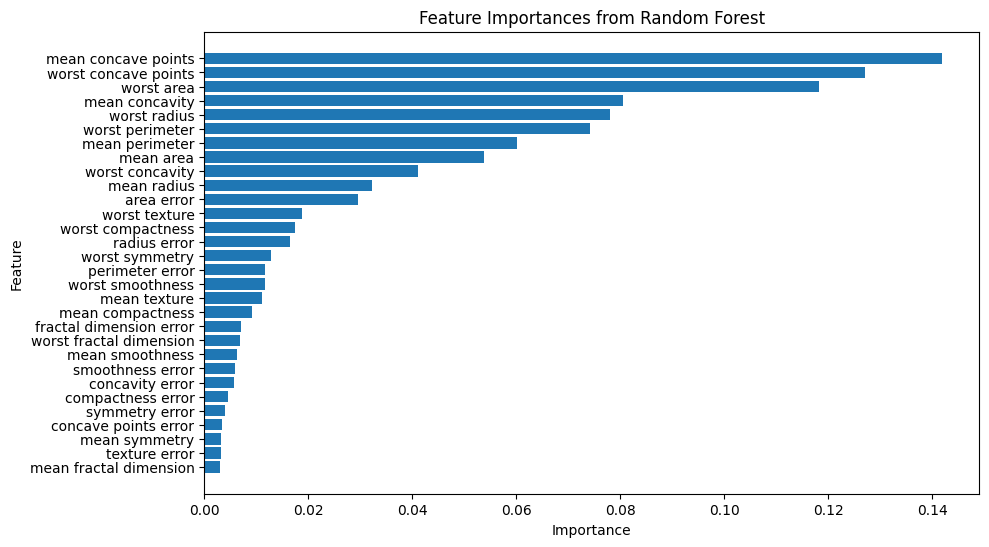

In [49]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

# 4 Use Corr()--> You can use heat map for this

In [50]:
# Combine the features and target into one DataFrame
df = x.copy()
df['target'] = y

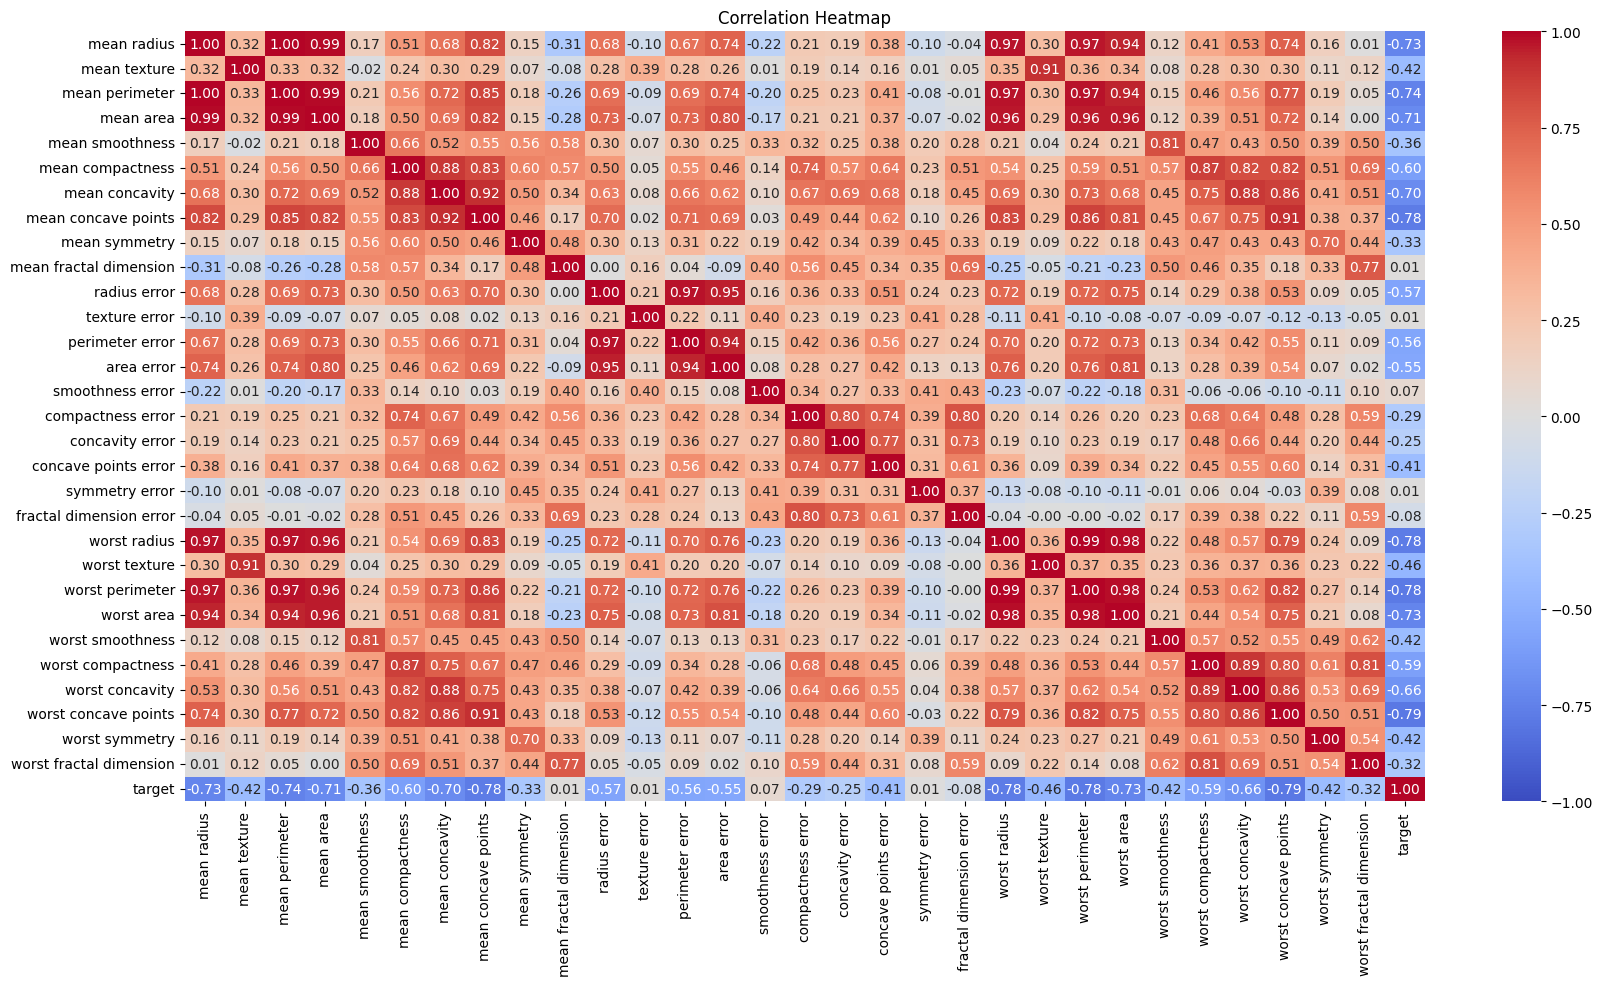

Relevant Features:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'radius error', 'perimeter error', 'area error', 'concave points error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [54]:
# Compute the correlation matrix
corr_matrix = df.corr()
# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()
# Analyze Correlations:
# Identify features with high correlation to the target variable.
# Identify pairs of features with high correlation to each other.
# Select features with correlation to the target above a certain threshold (e.g., 0.3)
threshold = 0.3
relevant_features = corr_matrix.index[corr_matrix['target'].abs() > threshold].tolist()
relevant_features.remove('target')  # Remove the target variable itself

print("Relevant Features:")
print(relevant_features)

# 5. Lasso

In [55]:
from sklearn.linear_model import Lasso

In [57]:
# Initialize the Lasso model with a regularization parameter (alpha)
lasso = Lasso(alpha=0.01, max_iter=10000)

# Fit the model
lasso.fit(x_train, y_train)

# Get the coefficients of the features
coefficients = pd.Series(lasso.coef_, index=x_train.columns)

# Select the features with non-zero coefficients
selected_features = coefficients[coefficients != 0].index.tolist()

print("Selected Features:")
print(selected_features)

Selected Features:
['mean texture', 'mean area', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concavity']


# Principal Component Analysis

In [68]:
from sklearn.decomposition import PCA, IncrementalPCA

In [59]:
np.random.seed(42)
n_samples=1000
n_features = 50
x_high_dim = np.random.rand(n_samples,n_features)

In [65]:
n_components = 2 #perform with two principle components
pca = PCA(n_components=n_components)
x_pca=pca.fit_transform(x_high_dim)

Text(0.5, 1.0, 'PCA')

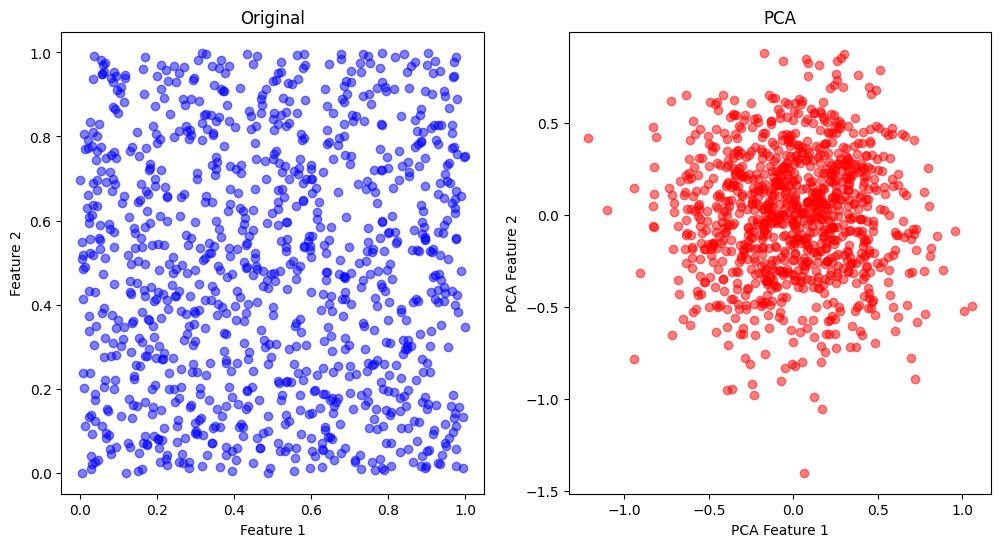

In [64]:
fig, axs =plt.subplots(1,2,figsize=(12,6))
axs[0].scatter(x_high_dim[:,0],x_high_dim[:,1],c='blue',alpha=0.5)
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')
axs[0].set_title('Original')

axs[1].scatter(x_pca[:,0],x_pca[:,1],c='red',alpha=0.5)
axs[1].set_xlabel('PCA Feature 1')
axs[1].set_ylabel('PCA Feature 2')
axs[1].set_title('PCA')

# IPCA

In [66]:
from sklearn.datasets import make_blobs

In [67]:
# Generate a large synthetic dataset
n_samples = 1000000
n_features = 50
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=10, random_state=42)

In [69]:
# Define the number of principal components you want to keep
n_components = 10

# Create the IncrementalPCA object
ipca = IncrementalPCA(n_components=n_components, batch_size=1000)

In [70]:
# Fit the model in batches
for i in range(0, X.shape[0], ipca.batch_size):
    ipca.partial_fit(X[i:i + ipca.batch_size])

# Transform the dataset in batches
X_ipca = np.zeros((X.shape[0], n_components))

for i in range(0, X.shape[0], ipca.batch_size):
    X_ipca[i:i + ipca.batch_size] = ipca.transform(X[i:i + ipca.batch_size])

print("Original shape:", X.shape)
print("Transformed shape:", X_ipca.shape)

Original shape: (1000000, 50)
Transformed shape: (1000000, 10)


# Kernal PCA

In [71]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_moons

In [72]:
# Generate a synthetic dataset
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

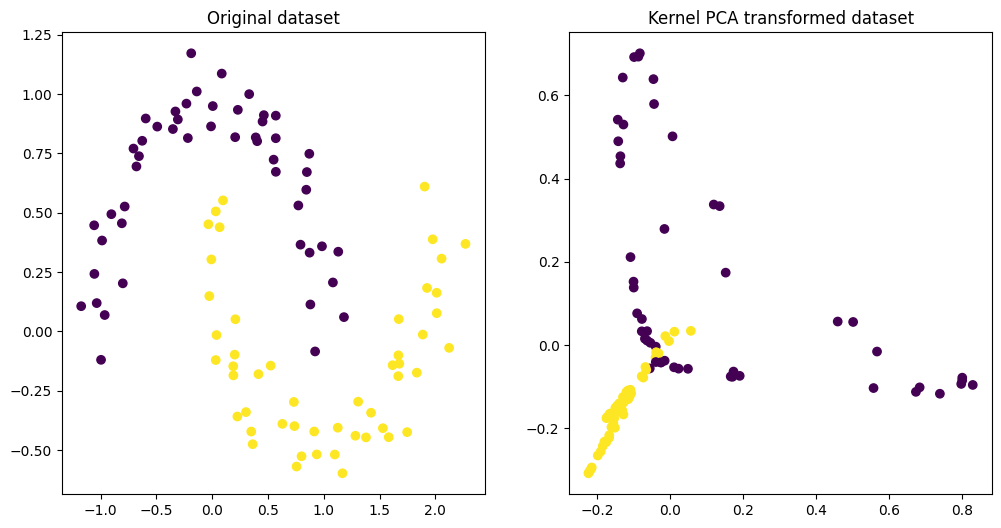

In [73]:
# Apply Kernel PCA with RBF kernel
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)
# Plot the original dataset
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Original dataset")

# Plot the transformed dataset
plt.subplot(1, 2, 2)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.title("Kernel PCA transformed dataset")

plt.show()

# Feature Scaling

In [74]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [78]:
data = pd.DataFrame({
    'Feature_A':[10,20,30,40,50],
    'Feature_B':[100,200,300,400,500],
    'Feature_C':[2,4,6,8,10]
})
#standardization
scaler_standard = StandardScaler()
x_standard = scaler_standard.fit_transform(data)

#Normalization
scaler_minmax = MinMaxScaler()
x_normalized = scaler_minmax.fit_transform(data)

print("Original Data: ")
print(data.head())
print("Standardized Data: ")
print(pd.DataFrame(x_standard ,columns=data.columns).head())
print("Normalized Data: ")
print(pd.DataFrame(x_normalized ,columns=data.columns).head())


Original Data: 
   Feature_A  Feature_B  Feature_C
0         10        100          2
1         20        200          4
2         30        300          6
3         40        400          8
4         50        500         10
Standardized Data: 
   Feature_A  Feature_B  Feature_C
0  -1.414214  -1.414214  -1.414214
1  -0.707107  -0.707107  -0.707107
2   0.000000   0.000000   0.000000
3   0.707107   0.707107   0.707107
4   1.414214   1.414214   1.414214
Normalized Data: 
   Feature_A  Feature_B  Feature_C
0       0.00       0.00       0.00
1       0.25       0.25       0.25
2       0.50       0.50       0.50
3       0.75       0.75       0.75
4       1.00       1.00       1.00


# HyperParameter Tuning

In [79]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [86]:
data=load_iris()
x=data.data
y=data.target
param_grid = {
    'n_estimators':[50,100,150],
    'max_depth':[None,5,10],
    'min_samples_split':[2,5,10]
}

rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(rf_classifier,param_grid,cv=3)
grid_search.fit(x,y)

print("Best parameters: from grid search: ")
print(grid_search.best_params_)

#random search 
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_grid,n_iter=10,cv=3)
random_search.fit(x,y)
print("Best hyperparameter from random search: ")
print(random_search.best_params_)

Best parameters: from grid search: 
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best hyperparameter from random search: 
{'n_estimators': 50, 'min_samples_split': 10, 'max_depth': 5}


# SMOTE: Synthetic Minority Over-Sampling Technique

In [87]:
#For imbalanced class distributions

In [90]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [91]:
# Generate a synthetic imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_clusters_per_class=1,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# Convert to a pandas DataFrame
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

# Display the class distribution
print("Original class distribution:")
print(df['target'].value_counts())

Original class distribution:
target
0    900
1    100
Name: count, dtype: int64


In [94]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled dataset back to a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=[f'feature_{i}' for i in range(X_resampled.shape[1])])
df_resampled['target'] = y_resampled

# Display the new class distribution
print("\nResampled class distribution:")
print(df_resampled['target'].value_counts())


Resampled class distribution:
target
0    900
1    900
Name: count, dtype: int64
